<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_0722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*   기계학습은 학습에 의해 모델을 구축한 후, Test dataset을 사용하여 N-fold class-validation으로 precision, recall, f1 및 MAPE, RMSE 등 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 실측하여 알 수 없다.
*   Time-series data에 의한 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 별도의 labeling 작업을 해야 한다.
*   즉, 한번 구축한 모델은 활용 단계에서 성능을 실측하는 것이 매우 어려우며, 비즈니스상에서 IT운영팀에서 이를 관리하는 것은 현실적으로 불가능 하다.
*   하지만, 비즈니스 상에서 모델의 활용 중에 성능이 저하된다면 의사결정 및 경영상의 문제를 초래 할 수 있다.
*   하여, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔다.
*   하지만, concept drift의 측정값 (통계량)을 통해 precision, recall, accuracy 등 직접적으로 성능을 예측하는 연구는 많지 않다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision, recall, accuracy 등 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다.












# Proposed Method

1.   Feature의 importanc를 측정하는 Lime 알고리즘은 reference data를 기반으로 가상의 dataset을 임의 생성(permutation)하여 model.predict에 의한 결과 (Y)를 대조 분석하여 importance를 추정(실험의 시행에 따른 statistics에 해당) 한다.
2.   즉, dataset의 feature중 x1의 값이 변하여도 Y의 변동이 없다면 x1의 importance는 낮은 것이다. 
3.   실험 dataset에서 X1의 변동량 대비 Y의 변동량을 통계적으로 측정하여 importance를 추정하는 것이다.
4.  유사한 원리로 data drift  model performance (accuracy) 모델을 생성할 수 있을 것이다.
5.   즉, 전체 Trainset에서 N-fold class-validation의 개념으로 reference dataset과 inference dataset을 임의로 나누고, 
6. inference dataset에 permutation에 의해 x의 값을 변형하여 drift를 유도하고,
7. reference 의 feature x1 대비 inference의 feature x1의 drift statistics 을 측정하고 (이때, x2,x3… 모든 feature의 drift statistics 이 측정될 것임) 이때의 inference dataset의 accuracy를 측정하여 y값으로 설정하고
8.   각 feature의 drift statistics 를 x로 설정하여 regressio에 의해 modeling (학습) 한다.
9.   물론, trainset 내의 분포, 범위라는 한계성을 갖지만,  직접적인 model 성능 추정이 가능할 것이다.









## reference data에 대응하는 inference data를 sampling(복원추출)하고, permutation에 의해 drift 주입, feature의 drift statistics 로부터 직접 model의 성능을 추정한다.

### sudo code

In [ ]:
trainset : y=f(x)
base_score = Score of base model
sampling_range = 0.05~0.95
sigma_multiplier = 1
for n sampling_count:
    y_ref, y_inf, x_ref, x_inf = split(y, x, sampling_range)
    x_inf = permutation(x_inf,sigma_multiplier)
    inf_score = score(y_inf, predict(x_inf))
    if base_score > inf_score:
        x_drift_statistics,x_drift_p_value = drift(x, x_inf)
        scores.add(inf_score)
        feature_drift.add(x_drift_statistics * (1 if x_drift_p_value < 0.05 else 0))
        
perfomance_predict_model = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift_statistics,x_live_drift_p_value = drift(x, x_live)
predict_score = perfomance_predict_model(x_live_drift_statistics * (1 if x_live_drift_p_value < 0.05 else 0))

# 실험 계획

*   Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>

* 예측 알고리즘
> Random-forest 알고리즘<BR>
> Deep-learning 알고리즘

* 실험
> 2010년 data를 기준으로 모델 학습<BR>
>2011년~2017년의 데이터를 2010년 학습데이터의 건수 (8000건) 단위로 drift 측정
모델의 예측 성능과 실 성능을 비교<BR>

* 실험의 변수
> feature_count (order of importance) = 5, 8, 10<br>
> sampling_range = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> sigma_multiplier = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 데이터 준비

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

np.random.seed(1337)

In [3]:
def seed_everything(seed: int = 45):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

In [4]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [5]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [6]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [7]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [8]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [9]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [10]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [11]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [12]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [13]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [14]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [15]:
df_accepted.shape

(1341026, 86)

In [16]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [17]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [18]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [19]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [20]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [21]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [22]:
X = {}
Y = {}

In [23]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [24]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [25]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [26]:
X[2010].shape

(11497, 81)

In [27]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [28]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

# 예측 모델 준비

In [29]:
ML = {}
scaler = MinMaxScaler()

In [30]:
MODEL_TYPE = 'RF'  ## RF / DL

## random forest 모델

In [31]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [32]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

# loan predict model build

In [38]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [50]:
a = np.asarray([1,2,3,4,5])
b = np.asarray([0,0,1,0,0])
a * b

array([0, 0, 3, 0, 0])

# model performance predict class

In [53]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm # import statsmodels 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import random
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

class MPP:
    def __init__(self,predict,column_names,importances ,y_ref,x_ref,y_inf,x_inf,scaler=None):
        self.predict = predict
        self.scaler = scaler
        self.y_ref = y_ref
        self.x_ref = x_ref
        self.y_inf = y_inf
        self.x_inf = x_inf
        self.COLUMNS = column_names
        importances = importances/sum(importances)

        self.l = []
        for x,(c,i) in enumerate(zip(column_names,importances)):
            self.l.append((c,i,x))
        self.l.sort(key = lambda x: x[1],reverse=True) 

        self.df_stat = pd.DataFrame({"mean":np.mean(x_ref,axis=0),"std":np.std(x_ref,axis=0)},index=column_names)

    def split_sample(self,yy,xx,train_size = 0.7, middle_offset = False):
        size = xx.shape[0]
        offset = int(size*train_size)
        mo = 0
        if middle_offset:
            mo = int(random.random() * (size - offset))
            #print(mo)

        x_ref1 = xx[mo:mo+offset]
        y_ref1 = yy[mo:mo+offset]
        x_inf1 = np.concatenate([xx[0:mo], xx[mo+offset:]], axis=0)
        y_inf1 = np.concatenate([yy[0:mo],yy[mo+offset:]], axis=0)

        return y_ref1,x_ref1,y_inf1,x_inf1 

    def __ks_2samp2(self,sample1, sample2):
        # Gets all observations
        sample1 = np.sort(sample1)
        sample2 = np.sort(sample2)
        n1 = sample1.shape[0]
        n2 = sample2.shape[0]   
        data_all = np.concatenate([sample1, sample2])
        cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
        cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
        # Evaluates the KS statistic
        cddiffs = cdf1 - cdf2
        minS = -np.min(cddiffs)
        maxS = np.max(cddiffs)
        ks_stat =  max(minS, maxS)
        
        if ks_stat == minS:
            ks_stat = -ks_stat
        
        # Calculates the P-Value based on the two-sided test
        # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
        m, n = float(n1), float(n2)
        en = m * n / (m + n)
        p_value = stats.kstwobign.sf(en * abs(ks_stat))

        return ks_stat,p_value
    
    def __ks_drift(self,ref_x,inf_x):
        x_drift = np.zeros((ref_x.shape[1],2))
        for i in range(ref_x.shape[1]):
            #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
            s, p = self.__ks_2samp2(ref_x[:,i],inf_x[:,i])
            x_drift[i,0] = s
            x_drift[i,1] = p
        return x_drift

    def __getImportanceColumnNameTop(self,prefix="", top=5):
        return [prefix+w for w in np.asarray(self.l[0:top])[:,0]]

    def __getImportanceIndexTop(self,top=5):
        return [int(w) for w in np.asarray(self.l[0:top])[:,2]]    


    def drift_sampling(self,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,TOP=5):

        self.itc = self.__getImportanceColumnNameTop(prefix="",top=TOP)
        self.toplist = self.__getImportanceIndexTop(top=TOP)
        print(self.itc)

        print("sampling_sigma:",sampling_sigma)
        print("permutaion_sigma:",permutaion_sigma)
        
        if self.scaler is not None:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(self.scaler.transform(x_inf)),average='binary')
        else:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(x_inf),average='binary')

        metric_a= []
        metric_b= []
        metric_c= []
        drift_data_ks_stats = []
        drift_data_ks_pvals = []
        drift_data_ks_stats_diff = []
        drift_data_ks_pvals_diff = []     
        drift_ratio1 = []
        drift_ratio2 = []
        for i in range(epoch):
            #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_ref.copy(), self.x_ref.copy(), train_size=random.uniform(1-sampling_sigma,sampling_sigma),middle_offset = True)
            #print(y_inf_d.shape, x_inf_d.shape)
            #o_drift = ks_drift(x_ref[:,top_list], x_inf_d[:,top_list])
            #permutation for x_inf_d
            #for v in toplist:

            # 20%의 feature에 대하여 permutaion...
            #for q in range(int(len(toplist)*0.2)):
            v = random.choice(self.toplist)
            x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, self.df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])
            """
            p1 = random.random()
            for v in self.toplist:
                nums = np.random.choice([0, 1], size=x_inf_d.shape[0], p=[1-p1, p1])
                x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, self.df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])*nums
            """
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            if acc[0] >0 and self.base_score[0] > acc[0]:
                x_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
                #sumo = np.sum((o_drift[:,0]))
                sumd = np.sum((x_drift[:,0]))
                #sump = np.sum(x_drift[:,1])
                #drift_ratio1.append(o_drift[:,0])
                #drift_ratio2.append(x_drift[:,0])
                print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f}", end="", flush=True)
                metric_a.append([acc[0]/self.base_score[0],acc[1]/self.base_score[1],acc[2]/self.base_score[2]])
                metric_b.append([(self.base_score[0] - acc[0]),(self.base_score[1] - acc[1]),(self.base_score[2] - acc[2])])
                metric_c.append([acc[0],acc[1],acc[2]])
                drift_data_ks_stats.append(x_drift[:,0])
                drift_data_ks_pvals.append(x_drift[:,1])
                #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
                #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
                drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

        metric_a = np.asarray(metric_a)
        metric_b = np.asarray(metric_b)
        metric_c = np.asarray(metric_c)        
        drift_data_ks_stats = np.asarray(drift_data_ks_stats)
        drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
        drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
        drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)

        # pericision의 distribution
        
        plt.hist(metric_c[:,0], bins = 20,range=(0,1))
        plt.show()
        """
        drift_ratio1 = np.asarray(drift_ratio1)
        drift_ratio2 = np.asarray(drift_ratio2)

        drift_ratio = []
        for s in range(len(toplist)):
            drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))
        """
        return  metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,y_ref.shape[0]

    def build_performance_model(self,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff):
        dx = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=self.COLUMNS[self.toplist])
        #dx = trainset
        print(dx.shape)

        self.model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
        # Print out the statistics
        print(self.model.summary())

    def __reject_outliers_2(self,data, m=1.64):
        data = np.asarray(data)
        mean = np.mean(data)
        print("\nraw MDR",mean,len(data))
        standard_deviation = np.std(data)
        distance_from_mean = abs(data - mean)
        max_deviations = m
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = data[not_outlier]
        print(len(data))
        """
        stdev = np.std(data)
        mean = np.mean(data)
        maskMin = mean - stdev * m
        maskMax = mean + stdev * m
        mask = np.ma.masked_outside(data, maskMin, maskMax)
        #print('Masking values outside of {} and {}'.format(maskMin, maskMax))
        """
        return no_outliers

    def getMDR(self, zscore=0.7):
        acc_infs = []
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize        
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            acc_infs.append(acc[0]/acc_inf)
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf} {(acc[0]/acc_inf):.4f}", end="", flush=True)

        #acc_infs = self.__reject_outliers_2(acc_infs).mean()

        mdr = np.mean(self.__reject_outliers_2(acc_infs,zscore))
        #mdr = mean(acc_infs)
        print("\nMDR:",mdr)
        return mdr 

    def build_second_performance_model(self):
        scnd_y = []
        scnd_x = []
        
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')
            
            scnd_x.append([acc_inf]) #+[d for d in dd])
            scnd_y.append(acc[0])
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf}", end="", flush=True)

        self.scnd_model = sm.OLS(scnd_y, np.asarray(scnd_x)).fit() ## sm.OLS(output, input)
        # Print out the statistics
        print(self.scnd_model.summary())

    def predict_precision_for_PPM(self,y_test2,X_test2,mdr,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            #dd = drift_scaler.transform(dd)
            #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
            #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

            #print(dd.values)
            #print(dd.values/drift_ratio)
            
            acc_c = self.model.predict(dd.values)[0]
            acc_c = acc_c / abs(mdr)
            
            if acc_c - beta > 0:
                beta = beta+ acc_c
            
            acc_c = self.base_score[0] + acc_c - beta
            """
            if beta == 0:
                beta = base_score[0] - acc_c
            acc_c = beta + acc_c
            """
            print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2


    def predict_precision_for_second_model(self,y_test2,X_test2,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            
            acc_c = self.model.predict(dd.values)[0]
            #acc_c = self.scnd_model.predict(np.asarray([acc_c] + [d for d in dd.values[0,:]]).reshape(1,-1))[0]
            acc_c = self.scnd_model.predict(np.asarray([acc_c]).reshape(1,-1))[0]

            if beta == 0:
                beta = self.base_score[0] - acc_c
            acc_c = beta + acc_c

            if acc_c > self.base_score[0]:
                acc_c = self.base_score[0]

            print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2

    def result_statistics(self,df2):
        MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
        MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        RMSE = np.sqrt(MSE)
        r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
        print('MAE',MAE)
        print('RMSE',RMSE)
        print('MAPE',MAPE)
        print('R2',r_2)
        #display adjusted R-squared
        #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
        #print('adj R2',adj_r2)
        return MAE,RMSE,MAPE,r_2        

# MPP생성 for loan predict model 

In [35]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017]))

## 두개의 regression test... (실패)

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 1.96
1000/1000 acc:0.9237 0.8554 0.8882 sum:-0.5111length: 8047
(732, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              4708.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        03:01:06   Log-Likelihood:                          200.70
No. Observations:                 732   AIC:                                     -393.4
Df Residuals:                     728   BIC:                                     -375.0
Df Model:                           4                                                  
Covariance Type:

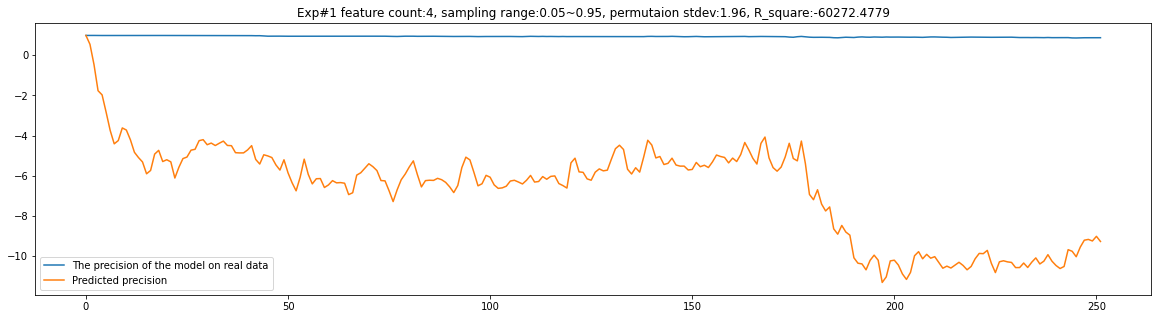

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1
top = 4
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
print("length:",length)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mpp1.build_second_performance_model()
df2 = mpp1.predict_precision_for_second_model(Y2,X2,window_size = 10000,step = 5000)
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))


## 정상적 실험

In [36]:
erdic = {}

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 1.96
1000/1000 acc:0.9128 0.7522 0.8248 sum:-0.5176

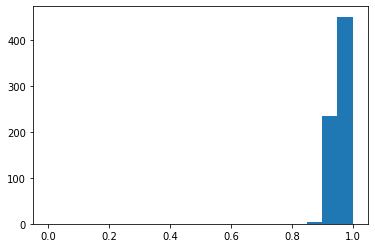

(689, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              8768.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        06:37:28   Log-Likelihood:                          414.72
No. Observations:                 689   AIC:                                     -821.4
Df Residuals:                     685   BIC:                                     -803.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------

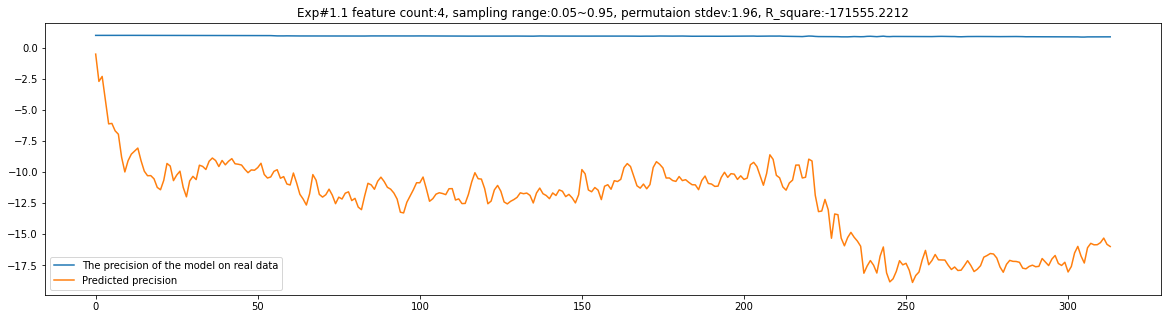

In [55]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.1
top = 4
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate']
sampling_sigma: 0.95
permutaion_sigma: 1.96
999/1000 acc:0.9751 1.0000 0.9874 sum:0.3165(570, 5)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2849.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:19:20   Log-Likelihood:                          145.59
No. Observations:                 570   AIC:                                     -281.2
Df Residuals:                     565   BIC:                                     -259.4
Df Model:                           5                                                  
Covariance Type:   

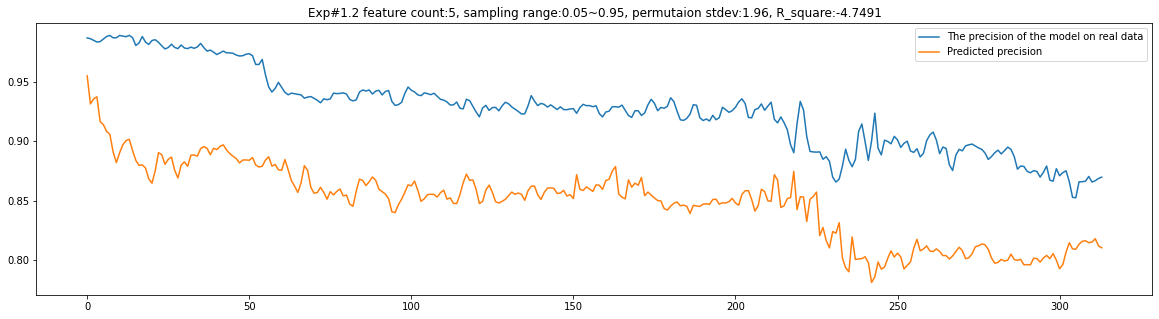

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.2
top = 5
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate', 'term']
sampling_sigma: 0.95
permutaion_sigma: 1.96
999/1000 acc:0.9051 0.7445 0.8170 sum:-0.3325(457, 6)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2274.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:22:03   Log-Likelihood:                          156.14
No. Observations:                 457   AIC:                                     -300.3
Df Residuals:                     451   BIC:                                     -275.5
Df Model:                           6                                                  
Covariance

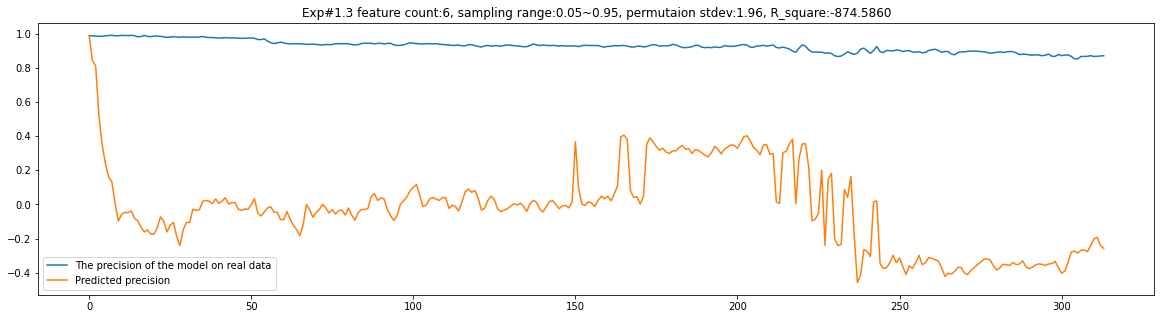

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.3
top = 6
samplingsigma=0.95
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.8
permutaion_sigma: 1.96
1000/1000 acc:0.9175 0.7666 0.8353 sum:-0.5178

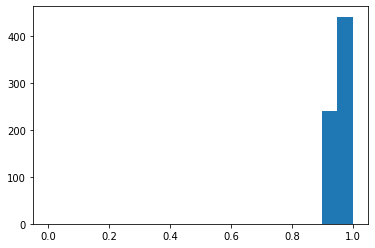

(682, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.853e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        06:40:41   Log-Likelihood:                          811.97
No. Observations:                 682   AIC:                                     -1616.
Df Residuals:                     678   BIC:                                     -1598.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------

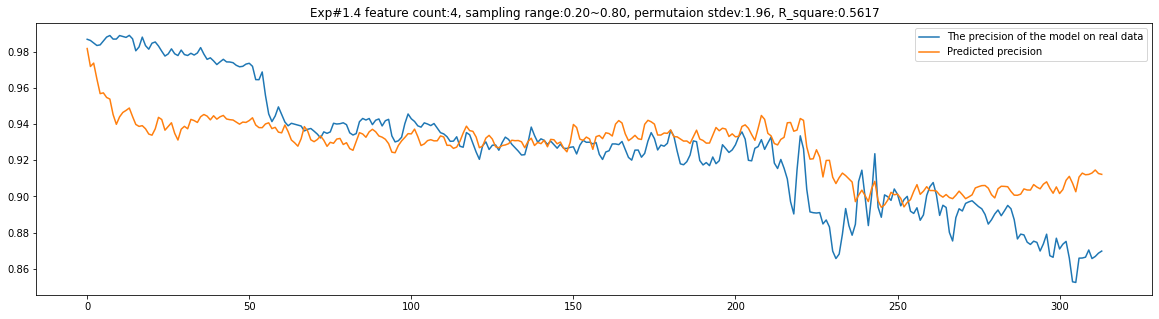

In [56]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.4
top = 4
samplingsigma=0.80
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.6
permutaion_sigma: 1.96
1000/1000 acc:0.9154 0.7483 0.8235 sum:-0.5128(679, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.225e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:27:21   Log-Likelihood:                          943.38
No. Observations:                 679   AIC:                                     -1879.
Df Residuals:                     675   BIC:                                     -1861.
Df Model:                           4                                                  
Covariance Type:            no

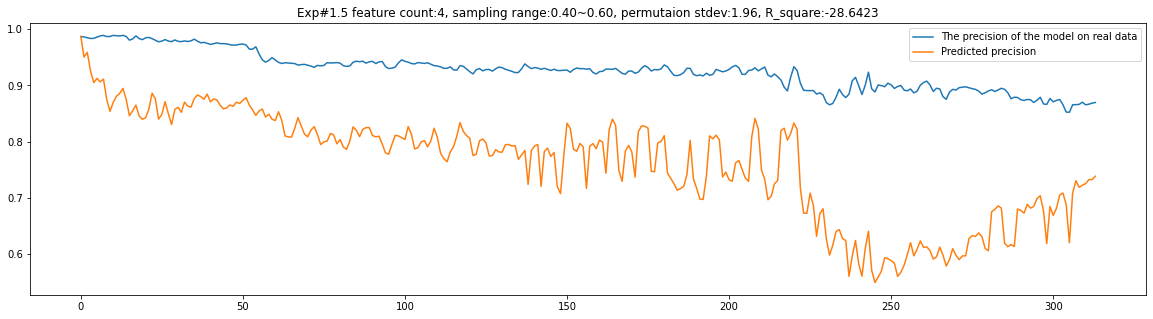

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.5
top = 4
samplingsigma=0.60
permutaionsigma=1.96

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 1.64
1000/1000 acc:0.9161 0.7522 0.8261 sum:-0.5151(684, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              3921.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:29:59   Log-Likelihood:                          146.39
No. Observations:                 684   AIC:                                     -284.8
Df Residuals:                     680   BIC:                                     -266.7
Df Model:                           4                                                  
Covariance Type:            n

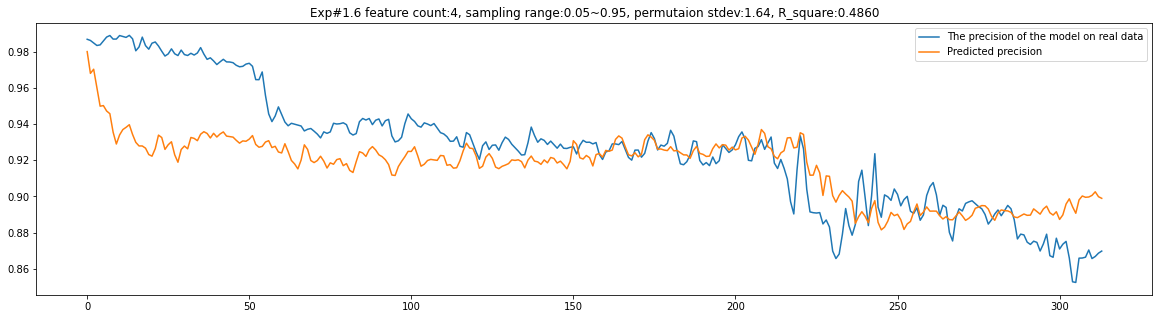

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.6
top = 4
samplingsigma=0.95
permutaionsigma=1.64

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.95
permutaion_sigma: 2.57
1000/1000 acc:0.9112 0.7522 0.8241 sum:-0.5189(694, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.045e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:32:54   Log-Likelihood:                          475.69
No. Observations:                 694   AIC:                                     -943.4
Df Residuals:                     690   BIC:                                     -925.2
Df Model:                           4                                                  
Covariance Type:            n

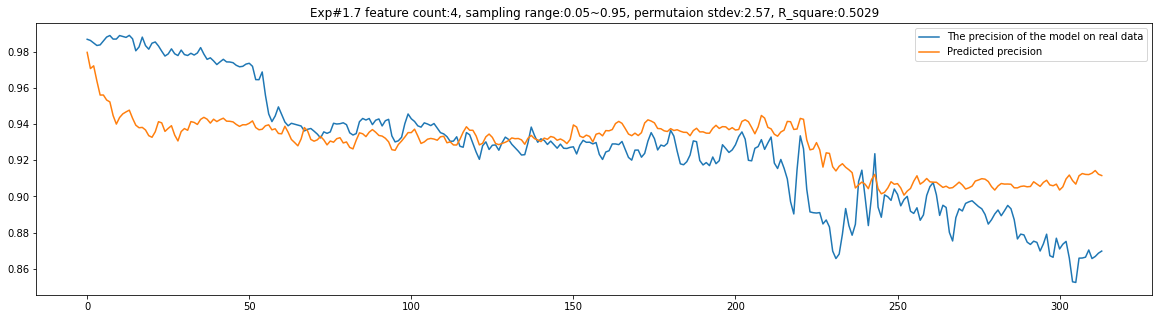

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.7
top = 4
samplingsigma=0.95
permutaionsigma=2.57

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee']
sampling_sigma: 0.8
permutaion_sigma: 2.57
1000/1000 acc:0.9162 0.7666 0.8347 sum:-0.5189(694, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.694e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:39:12   Log-Likelihood:                          909.93
No. Observations:                 694   AIC:                                     -1812.
Df Residuals:                     690   BIC:                                     -1794.
Df Model:                           4                                                  
Covariance Type:            no

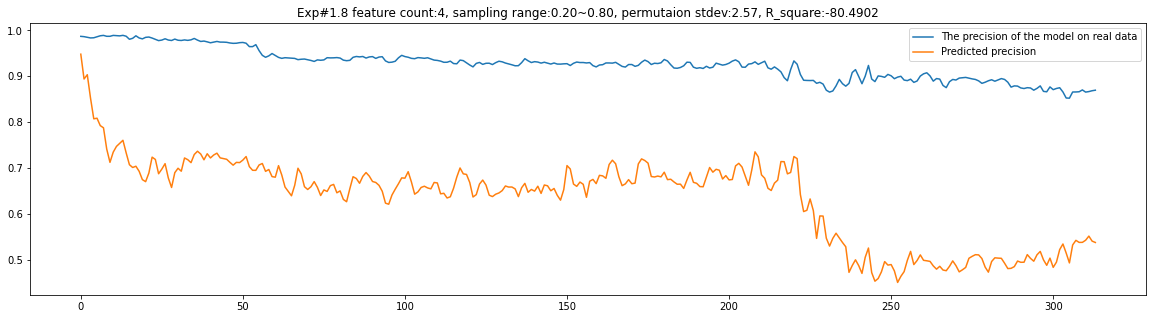

In [ ]:
seed_everything()

mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler)

Exp = 1.8
top = 4
samplingsigma=0.80
permutaionsigma=2.57

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp1.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp1.getMDR()
df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,window_size = length,step = int(length/2))
MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

## Error chart

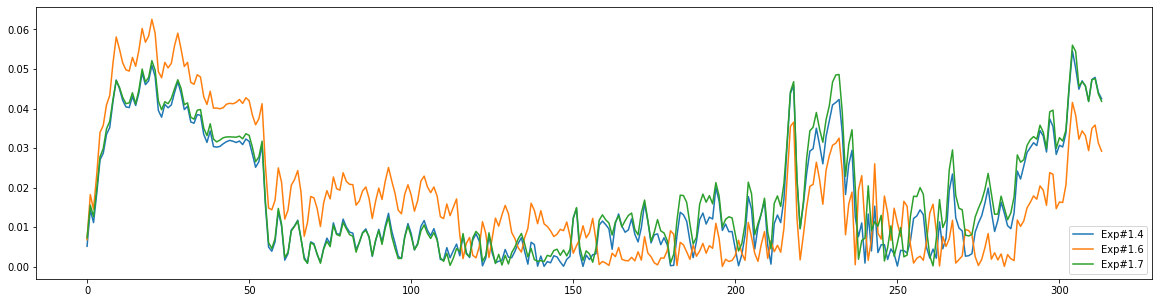

In [ ]:
error_df = pd.DataFrame(erdic)
error_df.drop(columns=['Exp#1.1','Exp#1.3','Exp#1.8','Exp#1.5','Exp#1.2']).plot(legend=True, figsize=(20,5))

# 여기서 부터는 다른 데이터셋, 모델로 검증


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 262M/263M [00:02<00:00, 148MB/s]
100% 263M/263M [00:02<00:00, 135MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

## 1/30 로 축소 한다.

In [ ]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_everything()

In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


## 기타 등등 전처리

In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827445
False     14216
Name: Errors?, dtype: int64

In [ ]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [ ]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [ ]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [ ]:
df = df.sort_values(['Year','Month','Day'])

In [ ]:
df.Year.value_counts()

2016    60326
2015    59760
2018    59698
2019    59505
2017    57865
2013    56995
2014    56821
2012    54842
2010    53462
2011    52539
2009    46234
2008    44327
2007    37206
2006    31467
2005    25132
2004    20526
2003    15821
2002    11863
2020    11119
2001     8892
2000     6188
1999     3987
1998     2646
1997     1693
1996     1000
1995      760
1994      474
1993      297
1992      163
1991       53
Name: Year, dtype: int64

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37206 entries, 12315197 to 14651078
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37206 non-null  int64  
 1   Amount      37206 non-null  float64
 2   Use Chip    37206 non-null  int64  
 3   MCC         37206 non-null  int64  
 4   is online   37206 non-null  int64  
 5   Hour        37206 non-null  int64  
 6   is vozmes   37206 non-null  int64  
 7   abs_amount  37206 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


## fraud detect model 만들기

이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [ ]:
X.shape

(37206, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_ref.shape[0] + x_inf.shape[0]

37206

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041442
0:	learn: 0.6220433	total: 7.24ms	remaining: 7.23s
1:	learn: 0.5550418	total: 13.6ms	remaining: 6.8s
2:	learn: 0.4983962	total: 20.9ms	remaining: 6.93s
3:	learn: 0.4558862	total: 26.9ms	remaining: 6.69s
4:	learn: 0.4142012	total: 31.9ms	remaining: 6.35s
5:	learn: 0.3751419	total: 39.7ms	remaining: 6.57s
6:	learn: 0.3423226	total: 45.2ms	remaining: 6.42s
7:	learn: 0.3129365	total: 50.7ms	remaining: 6.29s
8:	learn: 0.2889417	total: 57.2ms	remaining: 6.3s
9:	learn: 0.2678840	total: 62.5ms	remaining: 6.19s
10:	learn: 0.2495756	total: 68.1ms	remaining: 6.13s
11:	learn: 0.2317526	total: 74.3ms	remaining: 6.12s
12:	learn: 0.2210559	total: 80ms	remaining: 6.07s
13:	learn: 0.2083548	total: 85.1ms	remaining: 5.99s
14:	learn: 0.1999003	total: 90.2ms	remaining: 5.92s
15:	learn: 0.1893214	total: 95.9ms	remaining: 5.9s
16:	learn: 0.1800545	total: 102ms	remaining: 5.88s
17:	learn: 0.1719534	total: 107ms	remaining: 5.84s
18:	learn: 0.1647855	total: 112ms	remaining: 5.8s
1

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6935153583617748
0.7742806686873318


## 향후 데이터에 대한 precision...

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10242
           1       0.93      0.55      0.69       920

    accuracy                           0.96     11162
   macro avg       0.95      0.77      0.84     11162
weighted avg       0.96      0.96      0.95     11162



In [ ]:
base_score

(0.9321100917431193, 0.5521739130434783, 0.6935153583617748, None)

## importance 추출

In [ ]:
COLUMNS = X.columns

In [ ]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [ ]:
importances = cat.feature_importances_

## mpp2 생성 for credit card fraud detect model

In [ ]:
erdic= {}

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.4
1000/1000 acc:0.2590 0.3158 0.2846 sum:-0.1273(723, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              755.2
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                   1.31e-177
Time:                        04:58:04   Log-Likelihood:                         -162.01
No. Observations:                 723   AIC:                                      328.0
Df Residuals:                     721   BIC:                                      337.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      

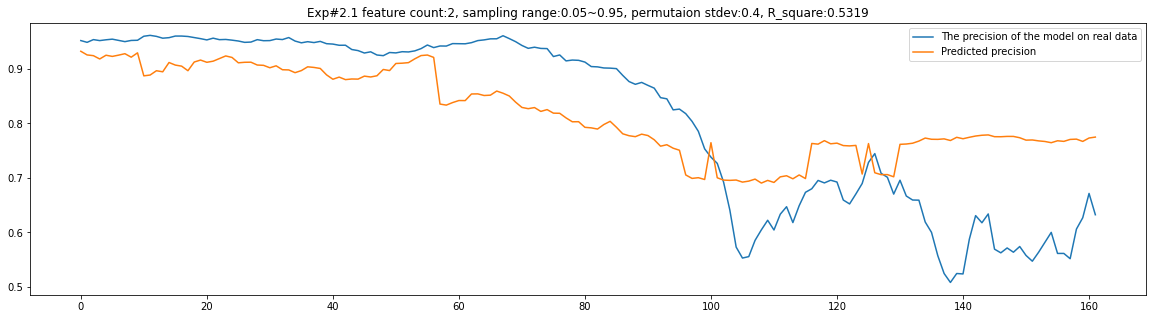

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.1
top = 2
samplingsigma=0.95
permutaionsigma=0.4

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour', 'abs_amount']
sampling_sigma: 0.95
permutaion_sigma: 0.4
618/1000 acc:0.9254 0.4276 0.5849 sum:-0.0506

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 acc:0.9291 0.4278 0.5859 sum:-0.0528(808, 3)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              1799.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:01:15   Log-Likelihood:                          20.876
No. Observations:                 808   AIC:                                     -35.75
Df Residuals:                     805   BIC:                                     -21.67
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.02

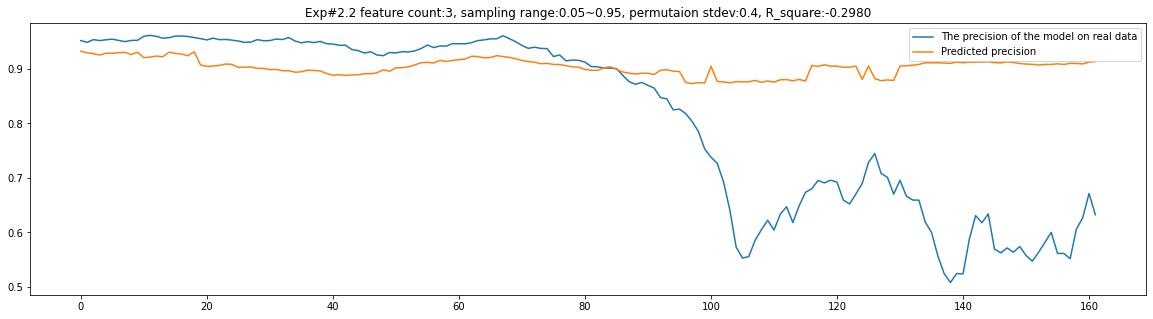

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.2
top = 3
samplingsigma=0.95
permutaionsigma=0.4

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour', 'abs_amount', 'Amount']
sampling_sigma: 0.95
permutaion_sigma: 0.4
1000/1000 acc:0.2590 0.3158 0.2846 sum:-0.0968(787, 4)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              1829.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:03:11   Log-Likelihood:                          58.711
No. Observations:                 787   AIC:                                     -109.4
Df Residuals:                     783   BIC:                                     -90.75
Df Model:                           4                                                  
Covariance Type:            nonrobust                                 

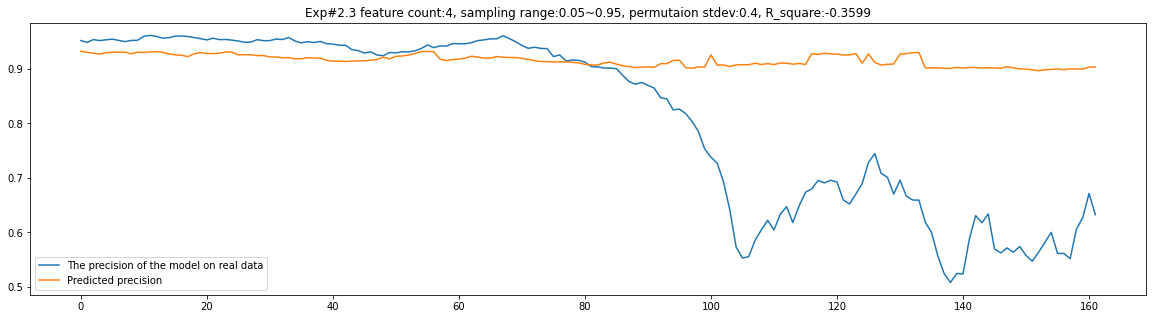

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.3
top = 4
samplingsigma=0.95
permutaionsigma=0.4

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.8
permutaion_sigma: 0.4
1000/1000 acc:0.2524 0.3306 0.2862 sum:-0.1332(730, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.743
Method:                 Least Squares   F-statistic:                              1054.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                   1.09e-215
Time:                        05:05:01   Log-Likelihood:                         -91.713
No. Observations:                 730   AIC:                                      187.4
Df Residuals:                     728   BIC:                                      196.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
       

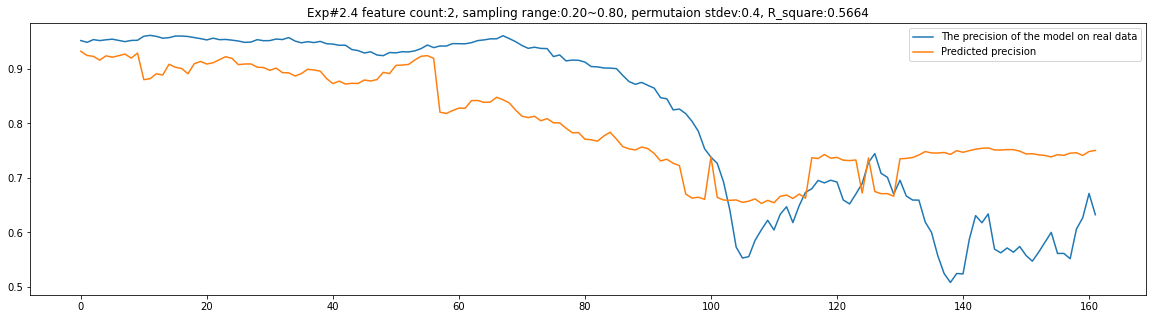

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.4
top = 2
samplingsigma=0.80
permutaionsigma=0.4

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.6
permutaion_sigma: 0.4
1000/1000 acc:0.2543 0.3915 0.3083 sum:-0.1373(717, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                              1667.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                   6.58e-270
Time:                        05:06:41   Log-Likelihood:                          54.627
No. Observations:                 717   AIC:                                     -105.3
Df Residuals:                     715   BIC:                                     -96.10
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
       

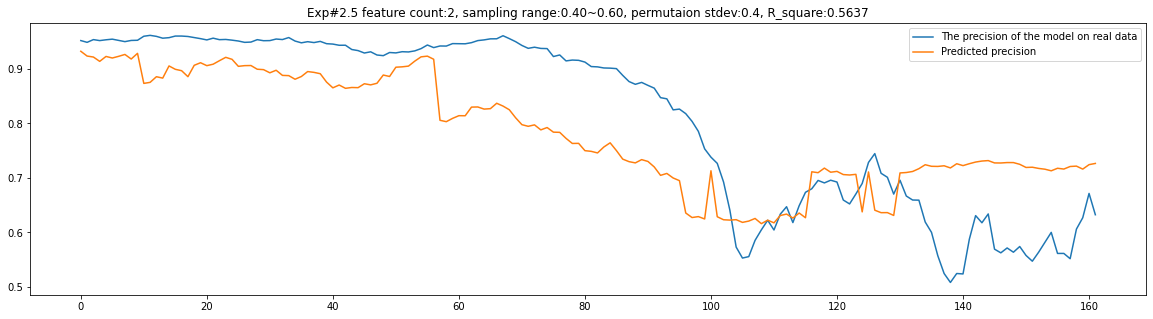

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.5
top = 2
samplingsigma=0.60
permutaionsigma=0.4

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.5
1000/1000 acc:0.2571 0.3158 0.2835 sum:-0.1490(773, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              2532.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:08:19   Log-Likelihood:                          132.77
No. Observations:                 773   AIC:                                     -261.5
Df Residuals:                     771   BIC:                                     -252.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      

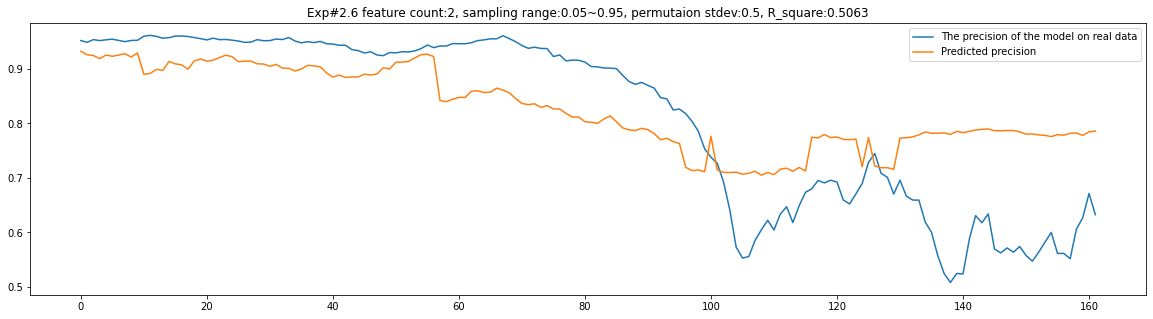

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.6
top = 2
samplingsigma=0.95 
permutaionsigma=0.5

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

['MCC', 'Hour']
sampling_sigma: 0.95
permutaion_sigma: 0.6
1000/1000 acc:0.2517 0.3333 0.2868 sum:-0.1660(807, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              2524.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:10:03   Log-Likelihood:                          100.55
No. Observations:                 807   AIC:                                     -197.1
Df Residuals:                     805   BIC:                                     -187.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      

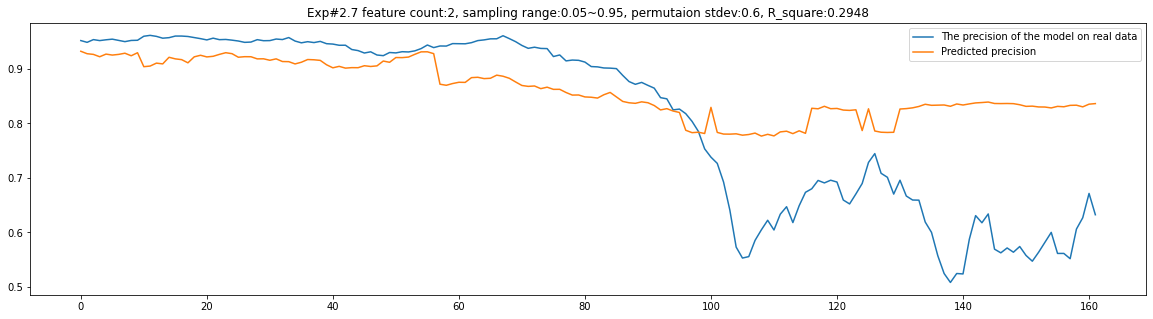

In [ ]:
seed_everything()

mpp2 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.7
top = 2
samplingsigma=0.95 
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp2.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
mpp2.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mdr = mpp2.getMDR()
df2 = mpp2.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp2.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
erdic["Exp#"+str(Exp)] = abs(df2['The precision of the model on real data'] - df2['Predicted precision']).values

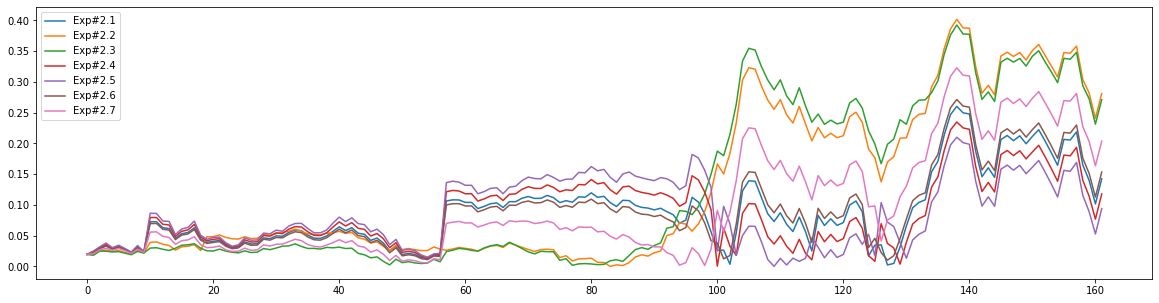

In [ ]:
error_df = pd.DataFrame(erdic)
error_df.plot(legend=True, figsize=(20,5))

['MCC', 'Hour']
sampling_sigma: 0.6
permutaion_sigma: 0.6
1000/1000 acc:0.9263 0.4422 0.5986 sum:-0.0790length: 26044
(808, 2)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              3239.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):                        0.00
Time:                        05:11:44   Log-Likelihood:                          164.93
No. Observations:                 808   AIC:                                     -325.9
Df Residuals:                     806   BIC:                                     -316.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                            

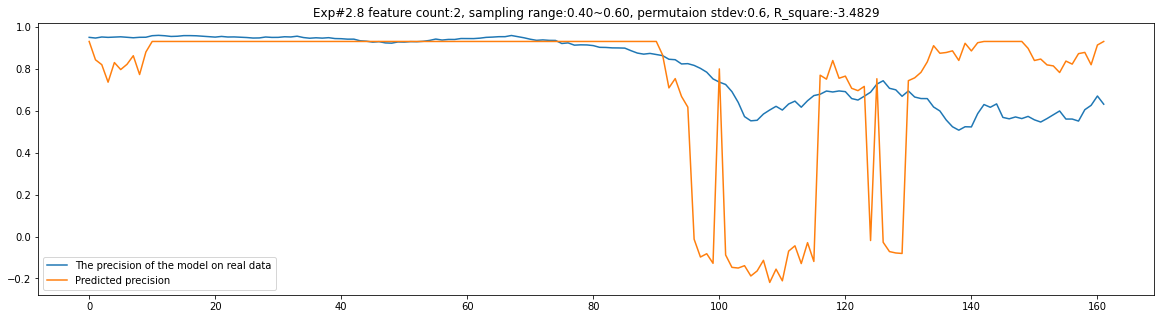

In [ ]:
mpp3 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None)

Exp = 2.8
top = 2
samplingsigma=0.60
permutaionsigma=0.6

metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp3.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
print("length:",length)
mpp3.build_performance_model(metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff)
mpp3.build_second_performance_model()
df2 = mpp3.predict_precision_for_second_model(y_test2.values,X_test2.values,window_size = 10000,step = 500)
MAE,RMSE,MAPE,r_2 = mpp3.result_statistics(df2)
df2.plot(title=f'Exp#{Exp} feature count:{top}, sampling range:{1-samplingsigma:.2f}~{samplingsigma:.2f}, permutaion stdev:{permutaionsigma}, R_square:{r_2:.4f}', figsize=(20,5))
